
# Project: Investigate a Dataset (TMDB movie data)

## Table of Contents
<ul>
<li><a href="#problem">Problem Understanding</a></li>
<li><a href="#data">Data Understanding</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this data analysis project, I am going to use Cross Industry Process for Data Mining (known as CRIPS-DM) as my guide to investigate TMDB movi
e data.

<a id='problem'></a>
## 1.Problem Understanding


### 1.1 Objective 
TMDB movie data investigation 

### 1.2 Description
The data that we are going to investigate is cleaned from data that available on Kaggle, which can offer us good opportunity to find out some interesting answers on people's movie selection behaviours and on the trends of movie making industry which can effects the business decision making.

<a id='data'></a>
## 2. Data Understanding

### 2.1 Import Libraries
We need to import python libraries containing the necessary functionality we will need.



In [100]:
# data processing, scientific computing, and linear algebra 
import numpy as np
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualizations
%matplotlib inline

### 2.2 Load data
let's read in and take a look at the data.

In [34]:
# get the csv files as a DataFrame
tmdb_data = pd.read_csv("tmdb-movies.csv")

### 2.3 Basic statistics

In [35]:
# to see the variables
tmdb_data.head(n=3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [36]:
# number of rows and columns in the data
tmdb_data.shape

(10866, 21)

We know that our data consists of 10866 observations of 21 variables.

#### 2.3.1 variables key information 
To get the dataset's variable types, how many observations there are and variable values.

In [37]:
# basic statistics
tmdb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### 2.3.2  Correlation heatmap building
To get which variables are important.

In [38]:
# calculate the correlation between features

corr = tmdb_data.corr()
tmdb_data.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


In [108]:
# heatmap ploting with helper function
cmap = sns.diverging_palette(250, 10, n=3, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())
    

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1,-0.014,-0.14,-0.099,-0.088,-0.036,-0.058,0.51,-0.19,-0.14
popularity,-0.014,1,0.55,0.66,0.14,0.8,0.21,0.09,0.51,0.61
budget,-0.14,0.55,1,0.73,0.19,0.63,0.081,0.12,0.97,0.62
revenue,-0.099,0.66,0.73,1,0.16,0.79,0.17,0.057,0.71,0.92
runtime,-0.088,0.14,0.19,0.16,1,0.16,0.16,-0.12,0.22,0.18
vote_count,-0.036,0.8,0.63,0.79,0.16,1,0.25,0.11,0.59,0.71
vote_average,-0.058,0.21,0.081,0.17,0.16,0.25,1,-0.12,0.093,0.19
release_year,0.51,0.09,0.12,0.057,-0.12,0.11,-0.12,1,0.017,-0.066
budget_adj,-0.19,0.51,0.97,0.71,0.22,0.59,0.093,0.017,1,0.65
revenue_adj,-0.14,0.61,0.62,0.92,0.18,0.71,0.19,-0.066,0.65,1


When looking at the correlation between variables I found that a few of them showed some degree of correlation, for example:
We can see that vote_count and popularity have 0.8 correlation, but it actually gives same information. Vote_count and revenue have 0.79 (strong correlation but weak information). budget and revenue have 0.73 (good correlation).

### Questions to Consider

I will look at the correlation between then revenue and the other variables in the dataset, and such questions to llok for are:

1. Will the revenue be higher if a known director is involved?
2. Does genre type of the film have a correlation to revenue?

<a id='wrangling'></a>
## 3. Data Wrangling

### 3.1 General Properties

In [40]:
# inspect data types 
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [41]:
# duplicate rows in the dataset
sum(tmdb_data.duplicated())

1

In [42]:
# look for features with missing values
tmdb_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### 3.2 Data Cleaning
I will drop some columns that I think it is not important for my analysis (does not mean it is not important at all, but I will drop it for matter of this investigation), part of these variables are strings, And I will do more numerical computing analysis.

In [43]:
# drop columns from the dataset
tmdb_data.drop(['id', 'imdb_id', 'overview', 'homepage', 'tagline', 'keywords', 'production_companies'], axis=1, inplace=True)

In [44]:
# confirm changes
tmdb_data.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [45]:
# remaining variables
tmdb_data.shape

(10866, 14)

We have now 14 variables.

In [47]:
# drop rows with any null values in the datasets
tmdb_data.dropna(how='any',axis=0, inplace=True) 

In [48]:
# checks if any of columns in the dataset have null values 
tmdb_data.isnull().sum().any()

False

In [49]:
# drop duplicates in the datasets
tmdb_data.drop_duplicates(inplace=True)

In [50]:
# print number of duplicates again to confirm dedupe
sum(tmdb_data.duplicated())

0

<a id='eda'></a>
## 4. Exploratory Data Analysis
### Research Question  (exploring revenue based on different variables)

In this section, I will explore the revenue and it's pattern using different variables.

In [51]:
# Grouping by director and revenue 
revenue_by_director = tmdb_data.groupby('director')['revenue'].sum()
revenue_by_director.sort_values(ascending=False).head(20)

director
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
David Yates          4154295625
Robert Zemeckis      3869690869
Chris Columbus       3851491668
Tim Burton           3665414624
Ridley Scott         3649996480
J.J. Abrams          3579169916
Gore Verbinski       3548779679
Ron Howard           3484471847
Roland Emmerich      3393325574
George Lucas         3316550893
Sam Raimi            3193820360
Francis Lawrence     3179979588
Joss Whedon          2963463144
Clint Eastwood       2824871255
Sam Mendes           2713548809
Name: revenue, dtype: int64

Text(0,0.5,'revenue')

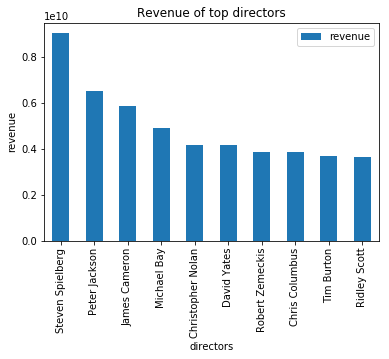

In [105]:
# ploting the directors and their revenue
revenue_by_director = pd.DataFrame(revenue_by_director)
revenue_by_director = revenue_by_director.sort_values(by = ['revenue'], ascending = False)
revenue_by_director[:10].plot(kind = 'bar')
plt.title('Revenue of top directors')
plt.xlabel('directors')
plt.ylabel('revenue')

We can see that some director generates more revenue than others.

In [56]:
# Grouping by cast and revenue 
revenue_by_cast = tmdb_data.groupby('cast')['revenue'].sum()
revenue_by_cast.sort_values(ascending=False).head(20)

cast
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                    2916544743
Sam Worthington|Zoe Saldana|Sigourney Weaver|Stephen Lang|Michelle Rodriguez        2781505847
Jennifer Lawrence|Josh Hutcherson|Liam Hemsworth|Woody Harrelson|Elizabeth Banks    2189157571
Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley                    2068178225
Martin Freeman|Ian McKellen|Richard Armitage|Ken Stott|Graham McTavish              1913519788
Kate Winslet|Leonardo DiCaprio|Frances Fisher|Billy Zane|Kathy Bates                1845034188
Mike Myers|Eddie Murphy|Cameron Diaz|Julie Andrews|Antonio Banderas                 1718796923
Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chris Hemsworth|Scarlett Johansson       1519557910
Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson         1513528810
Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson              1506249360
Ewan McGregor|Natalie Portman|Hayden Christen

If we have single (star) actor as a variable, that would help to estimate his impact on the revenue, but since here we have combination of actors, there is no way to find out.

In [98]:
# Grouping by title and revenue 
revenue_by_title = tmdb_data.groupby('original_title')['revenue'].sum()
revenue_by_title.sort_values(ascending=False).head(20)

original_title
Avatar                                           2781505847
Star Wars: The Force Awakens                     2068178225
Titanic                                          1845034188
The Avengers                                     1568080742
Jurassic World                                   1513528810
Furious 7                                        1506249360
Avengers: Age of Ultron                          1405035767
Harry Potter and the Deathly Hallows: Part 2     1327817822
Frozen                                           1277284869
Iron Man 3                                       1215439994
Minions                                          1156730962
Transformers: Dark of the Moon                   1123746996
The Lord of the Rings: The Return of the King    1118888979
Skyfall                                          1108561013
The Net                                          1106279658
The Dark Knight Rises                            1081041287
Pirates of the Caribbean:

Text(0,0.5,'movie title')

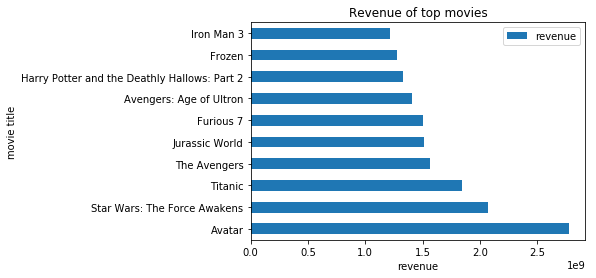

In [109]:
# ploting the top revenue
revenue_by_title = pd.DataFrame(revenue_by_title)
revenue_by_title = revenue_by_title.sort_values(by = ['revenue'], ascending = False)
revenue_by_title[:10].plot(kind = 'barh')
plt.title('Revenue of top movies')
plt.xlabel('revenue')
plt.ylabel('movie title')

We can observe that Steven Spielberg (who has 9018563772 as total revenue) movies are not in the top movies revenue.

In [76]:
# Grouping by genres and revenue 
revenue_by_genres = tmdb_data.groupby('genres')['revenue'].sum()
revenue_by_genres.sort_values(ascending=False).head(20)

genres
Comedy                                      20323889661
Drama                                       15107533347
Comedy|Romance                              11545724341
Adventure|Fantasy|Action                     7597483556
Comedy|Drama|Romance                         7251175696
Drama|Romance                                6798112125
Animation|Family                             6701726154
Action|Adventure|Science Fiction             6420484308
Adventure|Fantasy|Family                     6079516484
Adventure|Action|Science Fiction             5256276988
Adventure|Action|Thriller                    5208443468
Action|Thriller                              4942991441
Action|Adventure|Fantasy|Science Fiction     4928441131
Comedy|Drama                                 4851894696
Animation|Comedy|Family                      4559034000
Science Fiction|Action|Adventure             4073416568
Horror|Thriller                              3915491988
Action|Crime|Thriller                    

It turns out that Comedy movies are the most profitable movies (LOL).

In [77]:
# Finding out how movies are rated and counting how many visually 
movies_rating = tmdb_data.groupby(['vote_average'])['original_title'].count()

Text(0,0.5,'movies count')

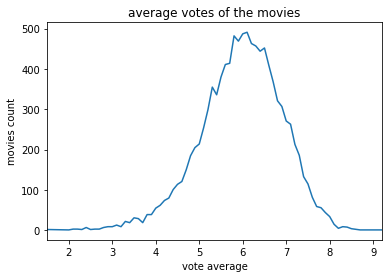

In [111]:
movies_rating.plot()
plt.title('average votes of the movies')
plt.xlabel('vote average')
plt.ylabel('movies count')

In [112]:
# counting out how movies per year
movies_per_year = tmdb_data.groupby(['release_year'])['original_title'].count()

Text(0,0.5,'movies count')

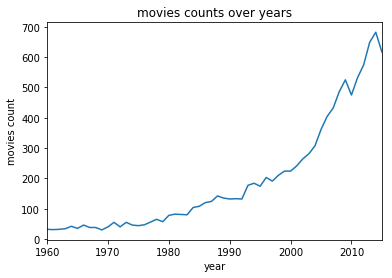

In [114]:
movies_per_year.plot()
plt.title('movies counts over years')
plt.xlabel('year')
plt.ylabel('movies count')

In [84]:
#  revenue over releasing year 
revenue_over_year = tmdb_data.groupby(['release_year'])['revenue'].sum()

Text(0,0.5,'revenue')

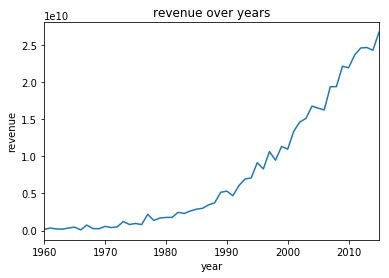

In [115]:
revenue_over_year.plot()
plt.title('revenue over years')
plt.xlabel('year')
plt.ylabel('revenue')

We can observe that the count of movies produced and the revenues increasing over time. 

<a id='conclusions'></a>
## Conclusions

We attempt in this investigation to analyze the relationships between the revenue and the other variables, and we found the revenue increasing over the years due to the increasing of the movies produced each year (both the count of the movies and the revenue are growing as the visuals illustrate). We analyzed the genre variable and the accumulated revenue of each genre, we found the comedy and drama are generated best revenue. we also analyzed directors variable in the light of revenue (Steven Spielberg was on the top) but his movies are not in the top movie's revenue (top movie was avatar which dircted by James Cameron who was third top on revenue). I tried to make this project as simple as possible, due to that the data needs more cleaning in order to ask and answer more complicated questions. 

The TMBD data are rich, we can derive important information and knowledge based on it, but there are too many corner to analyze and discover, which is not in the scope of this project). I think this data will be very promising for a machine learning project, by creating models that dive deeper into it to get nice and precise results and trends. 